In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\insurance.csv")
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [209]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [210]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## Analisa Variabel Deskriptif

In [211]:
# Mengetahui rata-rata umur pengguna.

print(df['age'].mean())

39.20702541106129


In [212]:
# Mengetahui rata-rata nilai BMI dari pengguna yang merokok.

groupby_smoker = df.groupby('smoker')['bmi']
smoker = groupby_smoker.get_group('yes').mean()
print(f"Rata-rata nilai BMI dari pengguna yang merokok adalah {smoker:.4f}")

Rata-rata nilai BMI dari pengguna yang merokok adalah 30.7084


In [213]:
# Mengetahui BMI mana yng lebih tinggi, laki-laki atau perempuan?

groupby_sex = df.groupby('sex')['bmi']
male = groupby_sex.get_group('male').mean()
female = groupby_sex.get_group('female').mean()

print(f"Rata-rata BMI laki-laki yaitu {male:.5f}, sementara rata-rata BMI perempuan yaitu {female:.5f}")
print("Dari perhitungan di atas, dapat diambil kesimpulan bahwa laki-laki memiliki nilai BMI yang lebih tinggi dibanding perempuan.")

Rata-rata BMI laki-laki yaitu 30.94313, sementara rata-rata BMI perempuan yaitu 30.37775
Dari perhitungan di atas, dapat diambil kesimpulan bahwa laki-laki memiliki nilai BMI yang lebih tinggi dibanding perempuan.


In [214]:
# Mengetahui BMI mana yang lebih tinggi, perokok atau non-perokok?

groupby_smoker = df.groupby('smoker')['bmi']
yes = groupby_smoker.get_group('yes').mean()
no = groupby_smoker.get_group('no').mean()

print(f"Rata-rata BMI perokok yaitu {yes:.5f}, sementara rata-rata non-perokok yaitu {no:.5f}")
print("Dari perhitungan di atas, dapat diambil kesimpulan bahwa perokok memiliki nilai BMI yang lebih tinggi dibanding non-perokok.")

Rata-rata BMI perokok yaitu 30.70845, sementara rata-rata non-perokok yaitu 30.65180
Dari perhitungan di atas, dapat diambil kesimpulan bahwa perokok memiliki nilai BMI yang lebih tinggi dibanding non-perokok.


In [215]:
# Mengetahui mana yang lebih tinggi, tagihan kesehatan terhadap perokok atau non-perokok?

groupby_smoker = df.groupby('smoker')['charges']
yes = groupby_smoker.get_group('yes').mean()
no = groupby_smoker.get_group('no').mean()

print(f"Rata-rata tagihan kesehatan bagi perokok yaitu {yes:.5f}, sementara rata-rata tagihan kesehatan bagi non-perokok yaitu {no:.5f}")
print("Dari perhitungan di atas, dapat diambil kesimpulan bahwa perokok memiliki nilai tagihan kesehatan yang lebih tinggi dibanding non-perokok.")

Rata-rata tagihan kesehatan bagi perokok yaitu 32050.23183, sementara rata-rata tagihan kesehatan bagi non-perokok yaitu 8434.26830
Dari perhitungan di atas, dapat diambil kesimpulan bahwa perokok memiliki nilai tagihan kesehatan yang lebih tinggi dibanding non-perokok.


In [216]:
# Mengetahui variance dari data 'charges' perokok dan non-perokok.

groupby_smoker = df.groupby('smoker')['charges']
yes = groupby_smoker.get_group('yes').var()
no = groupby_smoker.get_group('no').var()

print(f"Variance tagihan kesehatan dari perokok yaitu {yes:.5f}, sementara Variance tagihan kesehatan dari  non-perokok yaitu {no:.5f}")

Variance tagihan kesehatan dari perokok yaitu 133207311.20635, sementara Variance tagihan kesehatan dari  non-perokok yaitu 35925420.49611


## Analisa Variabel Kategorik

In [217]:
# Mengetahui gender mana yang memiliki tagihan paling tinggi

groupby_sex = df.groupby('sex')['charges']
male = groupby_sex.get_group('male').mean()
female = groupby_sex.get_group('female').mean()

print(f"Rata-rata tagihan kesehatan bagi laki-laki yaitu {male:.5f}, sementara rata-rata tagihan kesehatan bagi perempuan yaitu {female:.5f}")
print("Dari perhitungan di atas, dapat diambil kesimpulan bahwa laki-laki memiliki nilai tagihan kesehatan yang lebih tinggi dibanding perempuan.")

Rata-rata tagihan kesehatan bagi laki-laki yaitu 13956.75118, sementara rata-rata tagihan kesehatan bagi perempuan yaitu 12569.57884
Dari perhitungan di atas, dapat diambil kesimpulan bahwa laki-laki memiliki nilai tagihan kesehatan yang lebih tinggi dibanding perempuan.


In [218]:
# Mengetahui apakah setiap region memiliki jumlah data yang sama

region = df['region'].value_counts()
southeast = region[0] / len(df['region'])
southwest = region[1] / len(df['region'])
northwest = region[2] / len(df['region'])
northeast = region[3] / len(df['region'])

print(f"Data dari South East, South West, North West, dan North East secara berurutan sebesar {southeast:.2f}, {southwest:.2f}, {northwest:.2f}, {northeast:.2f}")

Data dari South East, South West, North West, dan North East secara berurutan sebesar 0.27, 0.24, 0.24, 0.24


In [219]:
# Mengetahui proporsi perokok dan non-perokok

smoker = df['smoker'].value_counts()
no = smoker[0] / len(df['smoker'])
yes = smoker[1] / len(df['smoker'])

print(f"jumlah perokok mencakup {yes:.5f} dari keseluruhan data. Sementara sisanya yaitu data dari non-perokok sebesar {no:5f}") 

jumlah perokok mencakup 0.20478 dari keseluruhan data. Sementara sisanya yaitu data dari non-perokok sebesar 0.795217


In [220]:
# Berapa peluang seseorang tersebut adalah perempuan jika diketahui dia adalah perokok?

# Mencari n seseorang berjenis kelamin perempuan dan merokok
print(df.groupby('sex')['smoker'].agg(sum=('value_counts')))

               sum
sex    smoker     
female no      547
       yes     115
male   no      517
       yes     159


In [221]:
# Dari data diketahui

n_perempuan_dan_merokok = 115
n_perokok = 274

# Menghitung probabilitas seseorang berjenis kelamin perempuan jika diketahui ia merokok.
p_perempuan_dan_merokok = n_perempuan_dan_merokok / n_perokok
print(f"Peluang seseorang berjenis kelamin perempuan jika diketahui ia merokok sebesar : {p_perempuan_dan_merokok:.4f}")

Peluang seseorang berjenis kelamin perempuan jika diketahui ia merokok sebesar : 0.4197


In [222]:
# Berapa peluang seseorang tersebut adalah laki-laki jika diketahui dia adalah perokok?

# Dari data diketahui
n_laki_dan_merokok = 159
n_perokok = 274

# Menghitung probabilitas seseorang berjenis kelamin laki-laki jika diketahui ia merokok.
p_laki_dan_merokok = n_laki_dan_merokok / n_perokok

print(f"Peluang seseorang berjenis kelamin laki-laki jika diketahui ia merokok sebesar : {p_laki_dan_merokok:.4f}")

Peluang seseorang berjenis kelamin laki-laki jika diketahui ia merokok sebesar : 0.5803


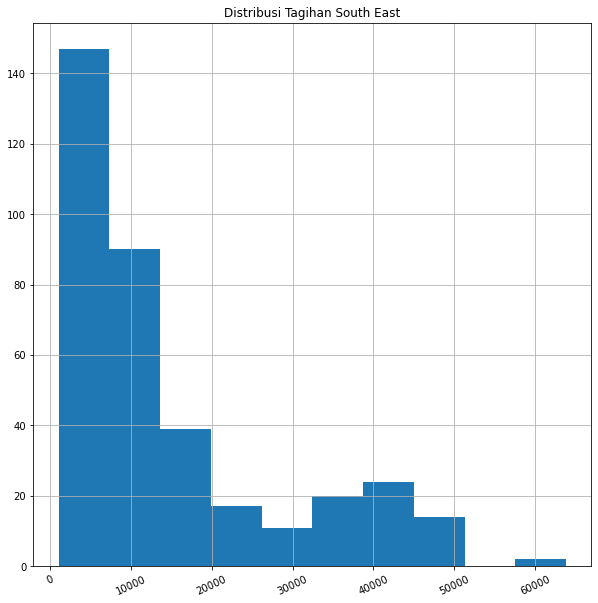

In [223]:
# Distribusi tagihan dari tiap region

# South East
groupby_region = df.groupby('region')['charges']
southeast = groupby_region.get_group('southeast')
southeast.hist(figsize=(10,10), xrot=25)
plt.title('Distribusi Tagihan South East')
plt.show()

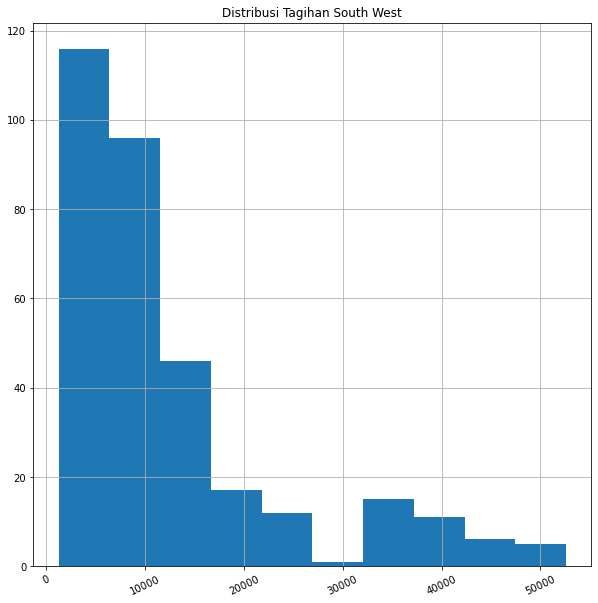

In [224]:
# South West
groupby_region = df.groupby('region')['charges']
southwest = groupby_region.get_group('southwest')
southwest.hist(figsize=(10,10), xrot=25)
plt.title('Distribusi Tagihan South West')
plt.show()

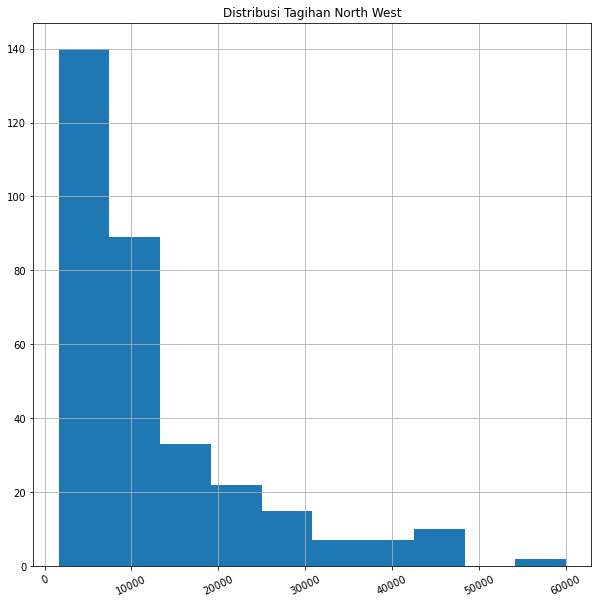

In [225]:
# North West
groupby_region = df.groupby('region')['charges']
northwest = groupby_region.get_group('northwest')
northwest.hist(figsize=(10,10), xrot=25)
plt.title('Distribusi Tagihan North West')
plt.show()

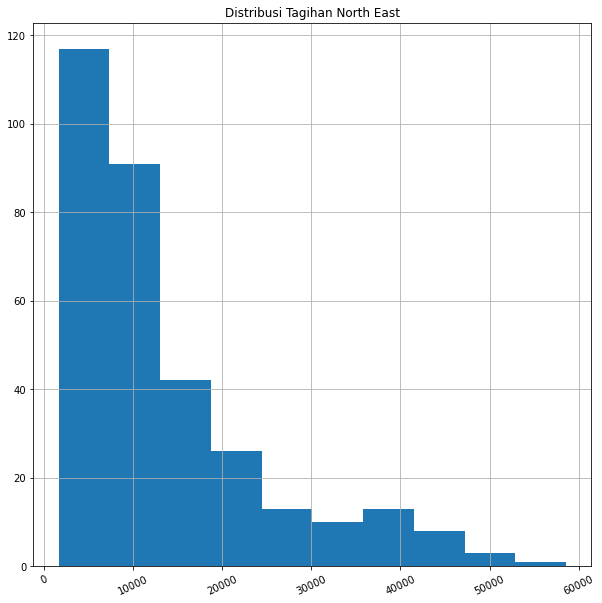

In [226]:
# North East
groupby_region = df.groupby('region')['charges']
northeast = groupby_region.get_group('northeast')
northeast.hist(figsize=(10,10), xrot=25)
plt.title('Distribusi Tagihan North East')
plt.show()

## Analisa Variabel Kontinu

In [251]:
# Mencari peluang besaran tagihan berdasarkan BMI

# Mencari event B (Jumlah orang dengan BMI di atas 25.000)
filter_criteria = (df['bmi'] > 25.000) 
bmi_above_25000 = df[filter_criteria]

# Mencari event A irisan B (Jumlah orang dengan tagihan di atas 15.000 dengan BMI di atas 25.000)
bmi_above_25000_with_charges_above_15000 = bmi_above_25000[bmi_above_25000['charges'] > 15000]

p_a_intersection_b = len(bmi_above_25000_with_charges_above_15000) / len(bmi_above_25000)

print(f"Peluang seseorang memiliki besaran tagihan kesehatan di atas 15.000 jika diketahui ia memiliki BMI di atas 25.000 adalah {p_a_intersection_b:.10f}")

Peluang seseorang memiliki besaran tagihan kesehatan di atas 15.000 jika diketahui ia memiliki BMI di atas 25.000 adalah 0.2731439047


In [228]:
# Mencari tahu berapa peluang seseorang yang diambil secara acak memiliki besaran tagihan kesehatan di atas 16.700 jika diketahui ia adalah perokok

# Mencari jumlah perokok
smoker = df[df['smoker'] == 'yes']

# Mencari jumlah individu yang memiliki tagihan kesehatan di atas 16.700 dan merokok
smoker_charges_above_16700 = smoker[smoker['charges'] >= 16700]

p_a_conditonal_b = len(smoker_charges_above_16700) / len(smoker)

print(f"Peluang seseorang yang diambil secara acak memiliki besaran tagihan kesehatan di atas 16.700 jika diketahui ia adalah perokok adalah {p_a_conditonal_b:.2f}")

Peluang seseorang yang diambil secara acak memiliki besaran tagihan kesehatan di atas 16.700 jika diketahui ia adalah perokok adalah 0.93


In [229]:
# Mencari kemungkinan terjadinya seorang perokok dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.700

# Mencari event B (Perokok dengan BMI di atas 25)
groupby_smoker = df.groupby('smoker')[['bmi', 'charges']]
smoker  = groupby_smoker.get_group('yes')
smoker_with_bmi_above_25 = smoker[smoker['bmi'] > 25]

# Mencari event A irisan B (Seseorang dengan tagihan di atas 16.700 di mana orang tersebut adalah perokok dengan BMI di atas 25)
charges_above_16700 = smoker_with_bmi_above_25[smoker_with_bmi_above_25['charges'] > 16700]

p_a_n_b = len(charges_above_16700) / len(smoker_with_bmi_above_25)

print(f"Peluang seseorang mendapatkan tagihan di atas 16.700 jika ia diketahui sebagai seorang perokok dengan BMI di atas 25 adalah {p_a_n_b:.2f}")

Peluang seseorang mendapatkan tagihan di atas 16.700 jika ia diketahui sebagai seorang perokok dengan BMI di atas 25 adalah 0.98


In [231]:
# Mana yang lebih mungkin terjadi: Seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.700 atau seseorang dengan BMI di bawah 25 mendapatkan tagihan kesehatan di atas 16.700

# Skenario 1
# Mencari event B (seseorang dengan tagihan kesehatan di atas 16.700)
b = df[df['charges'] >= 16700]

# Mencari event A irisan B (seseorang dengan BMI di atas 25 dan mendapatkan tagihan kesehatan di atas 16.700)
n_a_n_b = b[b['bmi'] >= 25]

p_a_intersection_b = len(n_a_n_b) / len(b)

# Skenario 2
# Event B tidak perlu dicari tahu karena sudah terjawab di atas

# Mencari event C irisan B (seseorang dengan BMI di bawah 25 dan mendapatkan tagihan kesehatan di atas 16.700)
n_c_n_b = b[b['bmi'] <= 25]

p_c_intersection_b = len(n_c_n_b) / len(b)

print(f"Probabilitas dari skenario 1 adalah {p_a_intersection_b:.2f} dan probabilitas dari skenario 2 adalah {p_c_intersection_b:.2f}")
print("Berdasarkan perhitungan di atas, dapat diketahui kalau peluang terjadinya skenario 1 lebih tinggi dibanding skenario 2.")


Probabilitas dari skenario 1 adalah 0.85 dan probabilitas dari skenario 2 adalah 0.15
Berdasarkan perhitungan di atas, dapat diketahui kalau peluang terjadinya skenario 1 lebih tinggi dibanding skenario 2.


In [253]:
# Mana yang lebih mungkin terjadi: seorang perokok dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.700 atau seorang non-perokok dengan BMI di atas 25 akan mendapatkan tagihan kesehatan di atas 16.700

# Skenario 1
# Mencari event B (Perokok dengan BMI di atas 25)
groupby_smoker = df.groupby('smoker')[['bmi', 'charges']]
smoker  = groupby_smoker.get_group('yes')
smoker_with_bmi_above_25 = smoker[smoker['bmi'] >= 25]

# Mencari event A irisan B (Seseorang dengan tagihan di atas 16.700 di mana orang tersebut adalah perokok dengan BMI di atas 25)
smoker_with_charges_above_16700 = smoker_with_bmi_above_25[smoker_with_bmi_above_25['charges'] >= 16700]

p_a_conditional_b = len(smoker_with_charges_above_16700) / len(smoker_with_bmi_above_25)

# Skenario 2
# Mencari event B (Non-perokok dengan BMI di atas 25)
groupby_smoker = df.groupby('smoker')[['bmi', 'charges']]
nonsmoker  = groupby_smoker.get_group('no')
nonsmoker_with_bmi_above_25 = nonsmoker[nonsmoker['bmi'] >= 25]

# Mencari event A irisan B (Seseorang dengan tagihan di atas 16.700 di mana orang tersebut adalah perokok dengan BMI di atas 25)
nonsmoker_with_charges_above_16700 = nonsmoker_with_bmi_above_25[nonsmoker_with_bmi_above_25['charges'] >= 16700]

p_c_conditional_b = len(nonsmoker_with_charges_above_16700) / len(nonsmoker_with_bmi_above_25)

print(f"Probabilitas dari skenario 1 adalah {p_a_conditional_b:.4f} dan probabilitas dari skenario 2 adalah {p_c_conditional_b:.4f}")
print("Berdasarkan perhitungan di atas, dapat diketahui kalau peluang terjadinya skenario 1 lebih tinggi dibanding skenario 2.")

Probabilitas dari skenario 1 adalah 0.9817 dan probabilitas dari skenario 2 adalah 0.0778
Berdasarkan perhitungan di atas, dapat diketahui kalau peluang terjadinya skenario 1 lebih tinggi dibanding skenario 2.


## Analisa Korelasi Variabel

In [256]:
# Mencari kovarians antara variabel BMI dan tagihan kesehatan.

bmi = df['bmi']
charges = df['charges']

# Membuat function kovarians
def covariance(x, y):
    # Mencari rata-rata dari 2 variabel
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Mengurangi rata2 dari masing-masing value dalam variabel
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

cov_func = covariance(bmi, charges)
print("Kovarians dari variabel BMI dan tagihan kesehatan adalah", cov_func)

Kovarians dari variabel BMI dan tagihan kesehatan adalah 14647.304426322171


In [257]:
# Menghitung korelasi antara variabel BMI dan tagihan kesehatan

def correlation(x, y):
    # Mencari rata-rata dari 2 variabel
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Mengurangi rata2 dari masing-masing value dalam variabel
    sub_x = [i-mean_x for i in x]
    sub_y = [i-mean_y for i in y]
    # Kovarians variabel x dan y
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    # Standar Deviasi variabel x dan y
    std_deviation_x = sum([sub_x[i]**2.0 for i in range(len(sub_x))])
    std_deviation_y = sum([sub_y[i]**2.0 for i in range(len(sub_y))])
    # Mengkuadratkan dengan 0,5 untuk mendapatkan akar kuadrat
    denominator = (std_deviation_x*std_deviation_y)**0.5 
    cor = numerator/denominator
    return cor

cor_func = correlation(bmi, charges)
print("Korelasi antara BMI dengan tagihan kesehatan adalah", cor_func)

Korelasi antara BMI dengan tagihan kesehatan adalah 0.19834096883362906


## Pengujian Hipotesis

Hipotesis pertama yang akan diuji adalah: Tagihan kesehatan perokok lebih besar dibandingkan tagihan kesehatan non-perokok

H0 : Rata-rata tagihan kesehatan perokok >= tagihan kesehatan non-perokok

H1 : Rata-rata tagihan kesehatan perokok < tagihan kesehatan non-perokok

Tingkat signifikansi (alpha) = 0,05

Uji yang sedang dilakukan merupakan uji pihak kiri. Maka dari itu, keputusan untuk menolak hipotesis yang diajukan tergantung dari apakah nilai statistik uji lebih kecil dari nilai kritis atau jika p-value lebih kecil dari 0,05.

In [240]:
filter_smoker = df['smoker'] == 'yes'
smoker = df[filter_smoker]
filter_nonsmoker = df['smoker'] == 'no'
nonsmoker = df[filter_nonsmoker]

# Mencari perbedaan rata-rata dari 2 populasi
mean_difference = smoker['charges'].mean() - nonsmoker['charges'].mean()

# Melakukan uji statistik
from statsmodels.stats.weightstats import ztest as ztest
uji_statistik = ztest(smoker['charges'], nonsmoker['charges'], mean_difference)

print(f"Dari perhitungan di atas, diperoleh z-test dan p-value secara berurutan sebesar {uji_statistik}")
print("Karena nilai p-value yang dihasilkan lebih besar dari 0,05, maka hipotesis nol yang diuji dapat diterima.")

Dari perhitungan di atas, diperoleh z-test dan p-value secara berurutan sebesar (-2.875444722276708e-14, 0.999999999999977)
Karena nilai p-value yang dihasilkan lebih besar dari 0,05, maka hipotesis nol yang diuji dapat diterima.


Hipotesis kedua yang akan diuji adalah: Tagihan kesehatan sekumpulan individu dengan BMI di atas 25 lebih besar dibandingkan tagihan kesehatan sekumpulan individu dengan BMI di bawah 25.

H0 : Tagihan kesehatan sekumpulan individu dengan BMI di atas 25 >= Tagihan kesehatan sekumpulan individu dengan BMI di bawah 25

H1 : Tagihan kesehatan sekumpulan individu dengan BMI di atas 25 < Tagihan kesehatan sekumpulan individu dengan BMI di bawah 25

Tingkat signifikansi (alpha) = 0,05

Uji yang sedang dilakukan merupakan uji pihak kiri. Maka dari itu, keputusan untuk menolak hipotesis yang diajukan tergantung dari apakah nilai statistik uji lebih kecil dari nilai kritis atau jika p-value lebih kecil dari 0,05.

In [241]:
filter_bmi_above_25 = df['bmi'] > 25
bmi_above_25 = df[filter_bmi_above_25]
filter_bmi_below_25 = df['bmi'] < 25
bmi_below_25 = df[filter_bmi_below_25]

# Mencari perbedaan rata-rata dari 2 populasi
mean_difference = bmi_above_25['bmi'].mean() - bmi_below_25['bmi'].mean()

# Melakukan uji statistik
from statsmodels.stats.weightstats import ztest as ztest
uji_statistik = ztest(bmi_above_25['bmi'], bmi_below_25['bmi'], mean_difference)

print(f"Dari perhitungan di atas, diperoleh z-test dan p-value secara berurutan sebesar {uji_statistik}")
print("Karena nilai p-value yang dihasilkan lebih besar dari 0,05, maka hipotesis nol yang diuji dapat diterima.")

Dari perhitungan di atas, diperoleh z-test dan p-value secara berurutan sebesar (1.0940767966494114e-14, 0.9999999999999912)
Karena nilai p-value yang dihasilkan lebih besar dari 0,05, maka hipotesis nol yang diuji dapat diterima.


Hipotesis ketiga yang akan diuji adalah: Tagihan kesehatan laki-laki lebih besar dari perempuan.

H0 : Tagihan kesehatan laki-laki >= Tagihan kesehatan perempuan

H1 : Tagihan kesehatan laki-laki < Tagihan kesehatan perempuan

Tingkat signifikansi (alpha) = 0,05

Uji yang sedang dilakukan merupakan uji pihak kiri. Maka dari itu, keputusan untuk menolak hipotesis yang diajukan tergantung dari apakah nilai statistik uji lebih kecil dari nilai kritis atau jika p-value lebih kecil dari 0,05.

In [242]:
filter_male_charges = df['sex'] == 'male'
male_charges = df[filter_male_charges]
filter_female_charges = df['sex'] == 'female'
female_charges = df[filter_female_charges]

# Mencari perbedaan rata-rata dari 2 populasi
mean_difference = male_charges['charges'].mean() - female_charges['charges'].mean()

# Melakukan uji statistik
from statsmodels.stats.weightstats import ztest as ztest
uji_statistik = ztest(male_charges['charges'], female_charges['charges'], mean_difference)

print(f"Dari perhitungan di atas, diperoleh z-test dan p-value secara berurutan sebesar {uji_statistik}")
print("Karena nilai p-value yang dihasilkan lebih besar dari 0,05, maka hipotesis nol yang diuji dapat diterima.")

Dari perhitungan di atas, diperoleh z-test dan p-value secara berurutan sebesar (0.0, 1.0)
Karena nilai p-value yang dihasilkan lebih besar dari 0,05, maka hipotesis nol yang diuji dapat diterima.
